# Classification by a neural network using keras
* What is a neural network?
* How do I compose a neural network using keras?
* How do I train a network?
* How do I get insight in the learning process?
* How do I measure performance?

## 1. Formulate/outline the problem

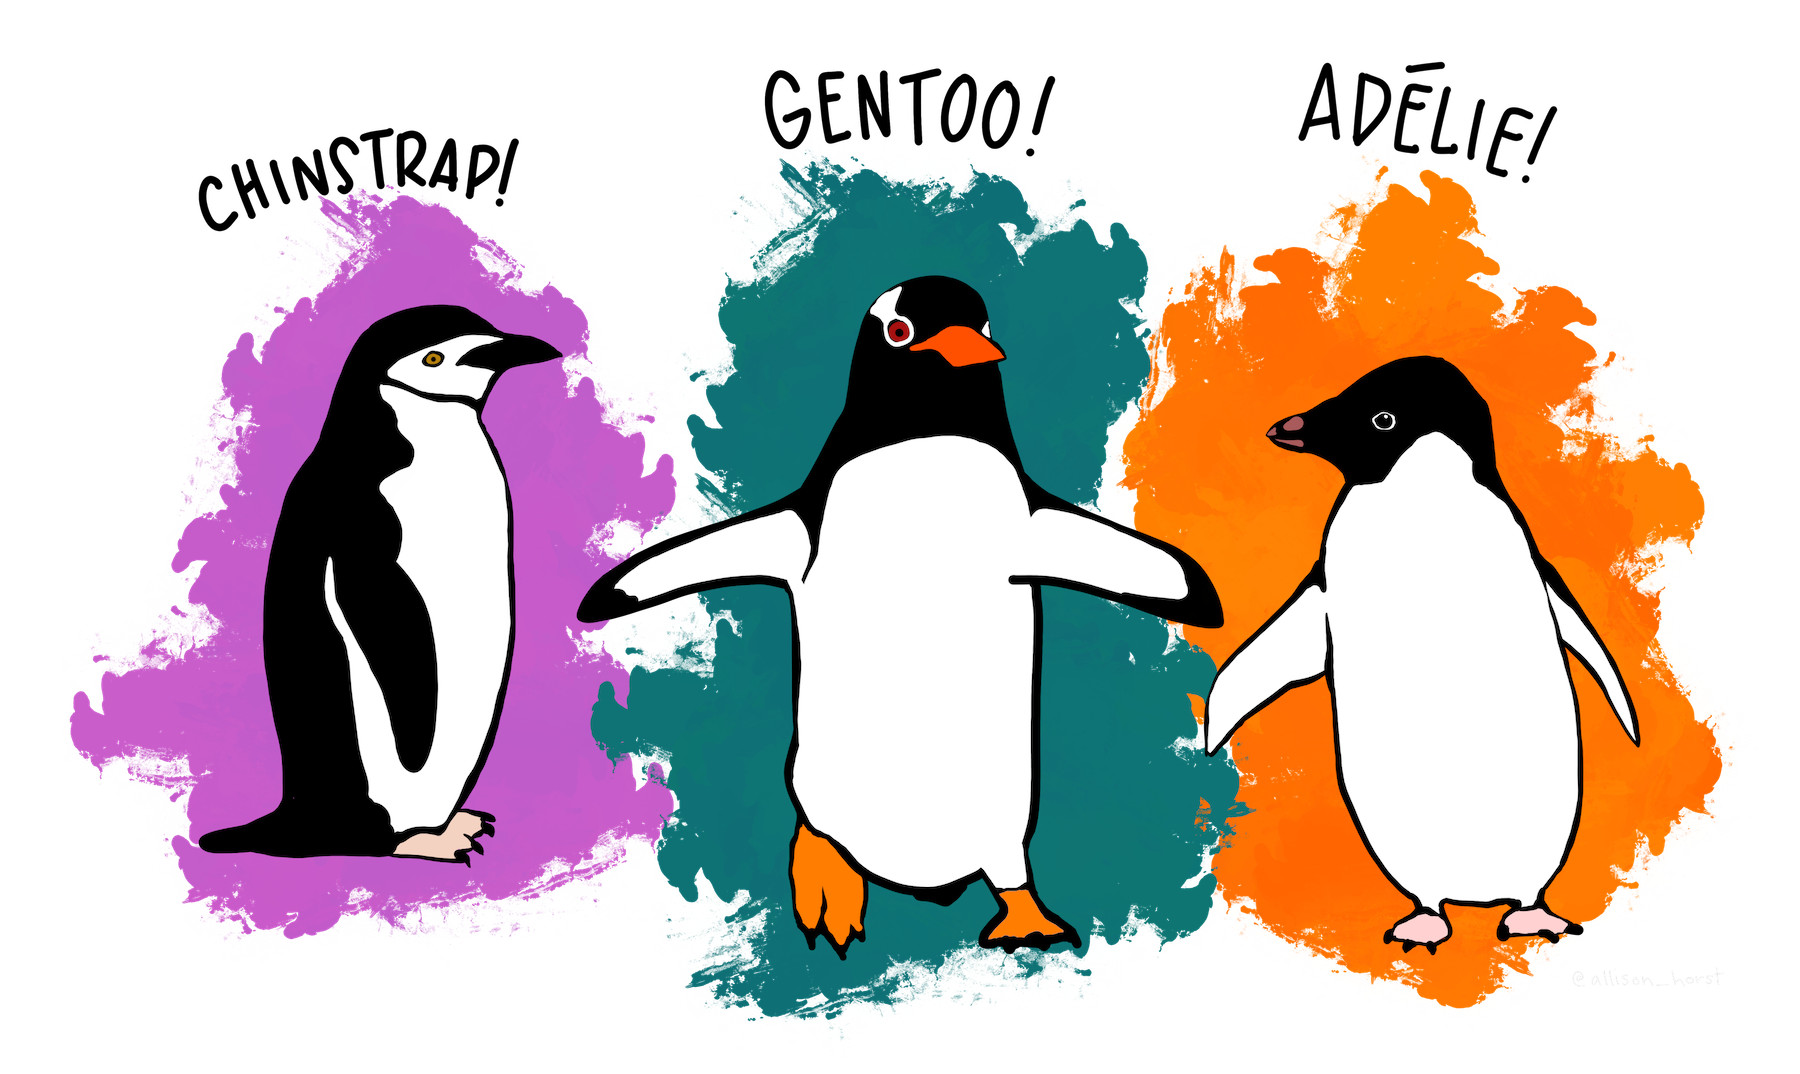

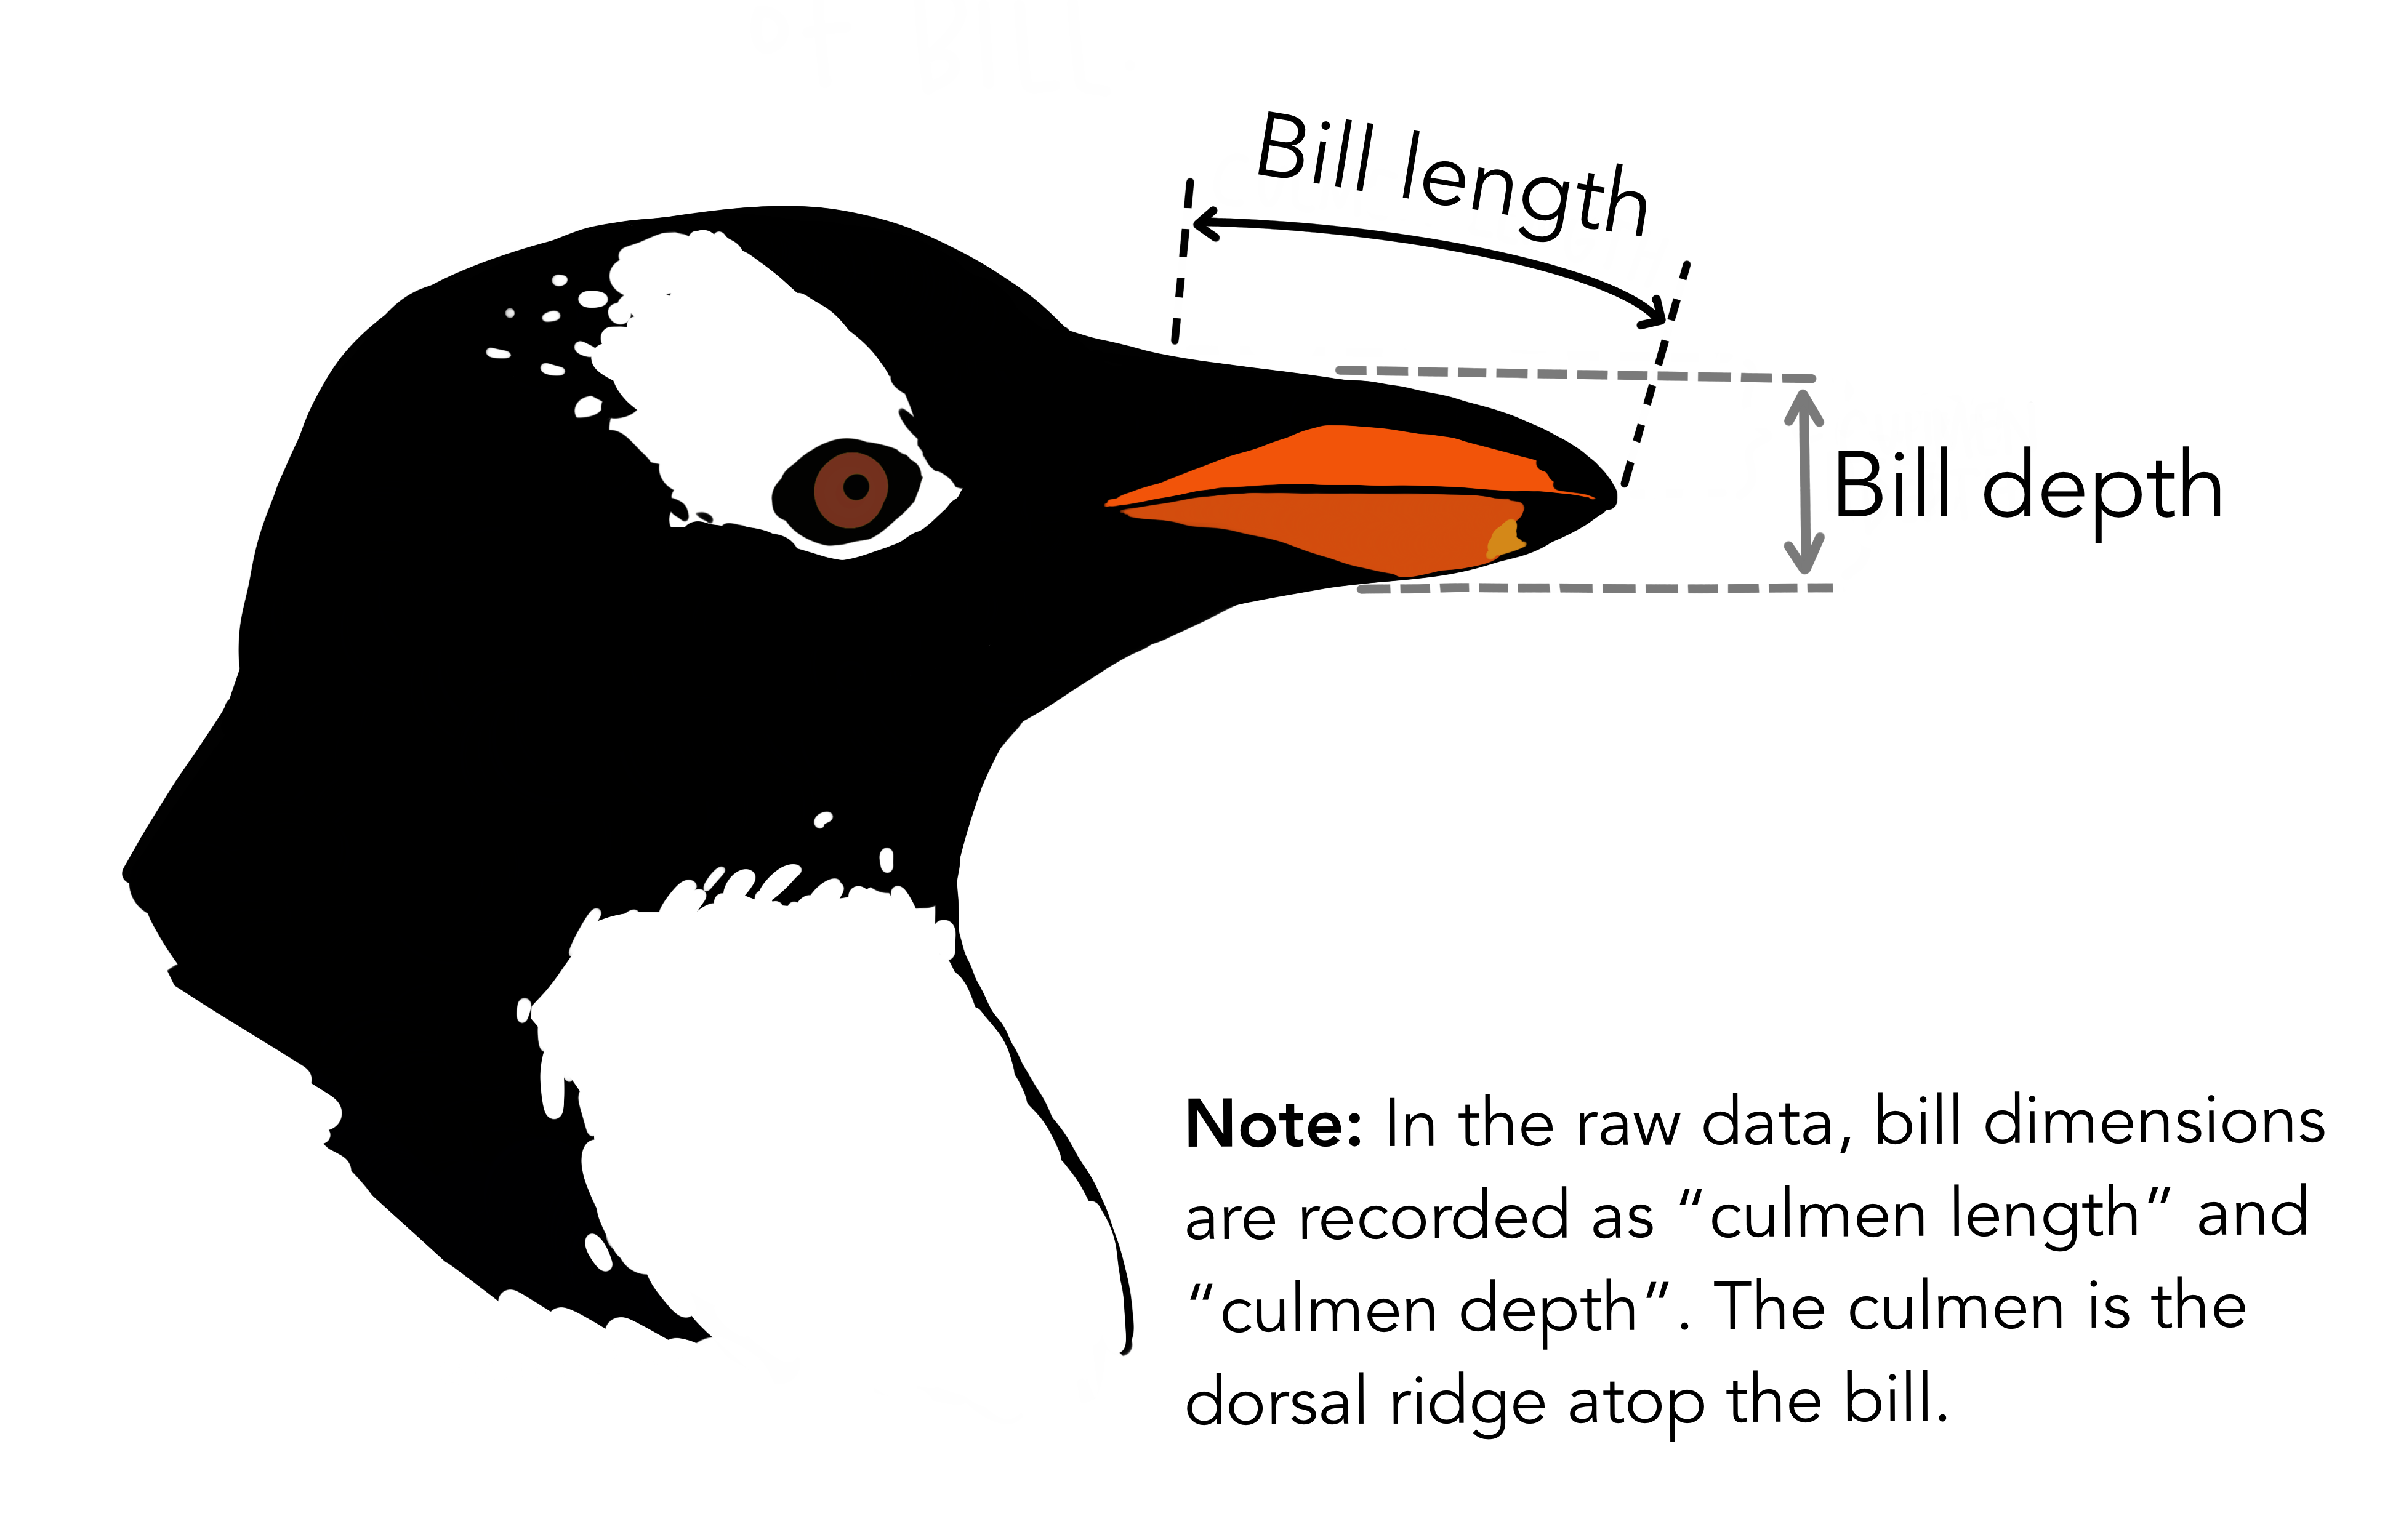

The goal is to predict the penguins' species using the attributes available in the dataset.

## 2. Identify inputs and outputs

In [1]:
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Penguin Dataset

Inspect the penguins dataset.
1. What are the different features called in the dataframe?
2. Are the target classes of the dataset stored as numbers or strings?
3. How many samples does this dataset have?
4. (optional) Do you think this will be an easy or difficult machine learning problem?
5. (optional) Do you think we have anough samples in our dataset to train our neural network?
6. (optional) Are there missing values and do you think it will be a problem when training our network?

BREAK UNTIL 11:45

In [4]:
# 1. What are the different features called in the dataframe?
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
# 2. Are the target classes of the dataset stored as numbers or strings?
penguins['species']

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [6]:
# 3. How many samples does this dataset have?
len(penguins)

344

#### A bit of data exploration

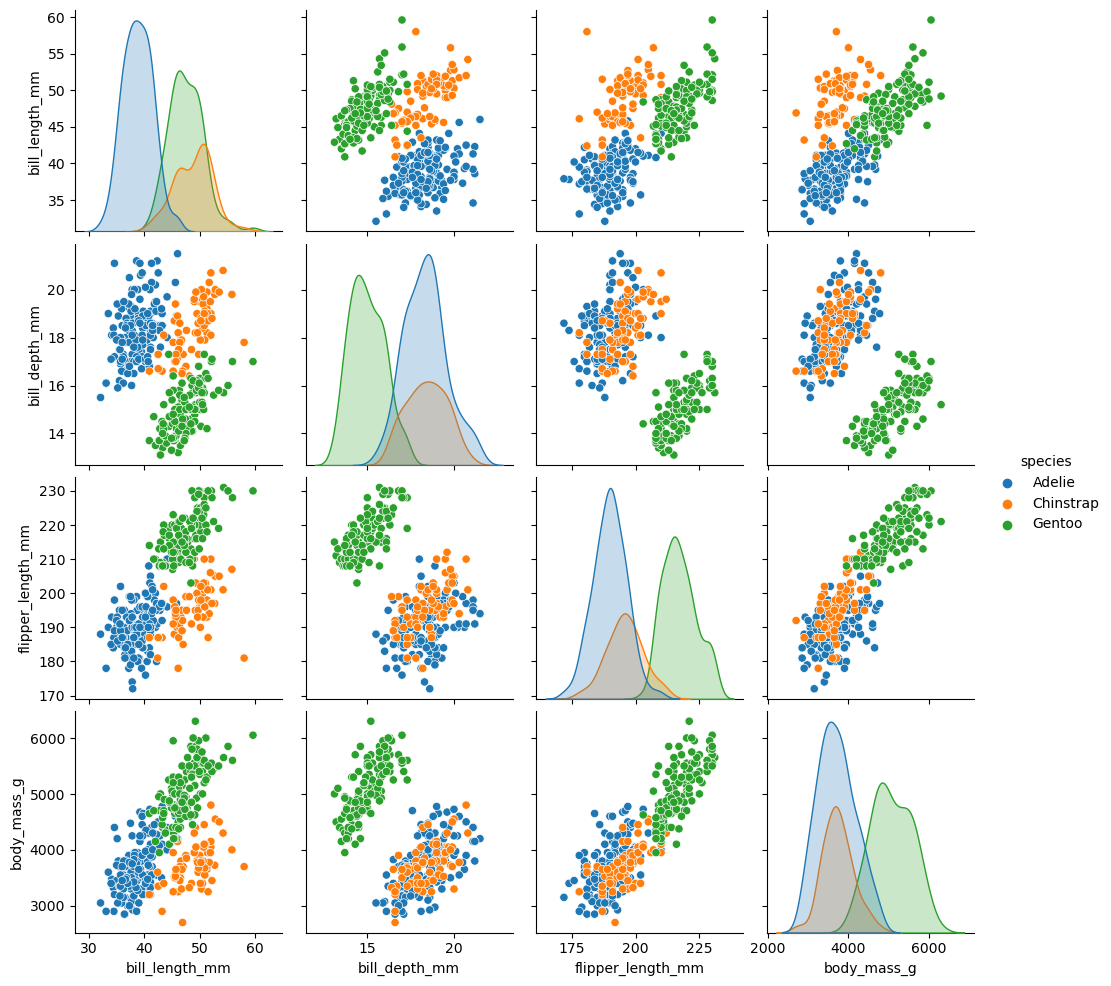

In [7]:
sns.pairplot(penguins, hue="species")

## Pairplot

Take a look at the pairplot we created. Consider the following questions:

* Is there any class that is easily distinguishable from the others?
* Which combination of attributes shows the best separation for all 3 class labels at once?
* (optional) what happened to the sex and island features, why are they not shown and can you find a way to visualize them?
* (optional) can you answer above questions for those 2 features?


## 3. Prepare data

In [8]:
penguins['species'] = penguins['species'].astype('category')

In [9]:
penguins['species']

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [10]:
# drop the island and sex columns AND drop all rows containing NaN values
penguins_filtered = penguins.drop(columns=['island', 'sex']).dropna()

In [11]:
penguins_features = penguins_filtered.drop(columns=['species'])

### One-hot encoding

In [12]:
import pandas as pd
target = pd.get_dummies(penguins_filtered['species'])
target.head()

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0


In [13]:
target.tail()

,Adelie,Chinstrap,Gentoo
338,0,0,1
340,0,0,1
341,0,0,1
342,0,0,1
343,0,0,1


## One-hot encoding vs ordinal encoding

1. How many output neurons will our network have now that we
one-hot encoded the target class?
2. Another encoding method is 'ordinal encoding'.
Here the variable is represented by a single column,
where each category is represented by a different integer
(0, 1, 2 in the case of the 3 penguin species).
How many output neurons will a network have when ordinal encoding is used?
3. (Optional) What would be the advantage of using one-hot versus ordinal encoding
for the task of classifying penguin species?
4. (optional) Let's say we want to use the sex and island columns as features. How would you represent them numerically? What will be the size of our feature vector in that case?

### Split data in training and test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(penguins_features, target, test_size=0.2,
                                                    random_state=0, shuffle=True, stratify=target)

## Training and Test sets

Take a look at the training and test set we created.
- How many samples do the training and test sets have?
- Are the classes in the training set well balanced?
- (optional) let's say that the balance in the dataset will be a big problem, how would you solve it?
- (optional) Could you also use cross-validation? Why would you want to use it? Why would you not want to use it?

In [16]:
# how many samples?
X_train.shape

(273, 4)

In [17]:
X_test.shape

(69, 4)

In [18]:
# Well balanced?
y_train.sum()

Adelie       121
Chinstrap     54
Gentoo        98
dtype: int64

## 4. Build an architecture from scratch or choose a pretrained model

In [19]:
from tensorflow import keras

2023-05-23 14:01:13.261700: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-23 14:01:13.263080: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 14:01:13.289924: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 14:01:13.290467: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 14:01:13.734532: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [20]:
# random seeds
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [21]:
inputs = keras.Input(shape=X_train.shape[1])

In [22]:
inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'input_1')>

In [23]:
hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)

In [24]:
output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)

In [25]:
model = keras.Model(inputs=inputs, outputs=output_layer)

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


### Create the neural network

With the code snippets above, we defined a Keras model with 1 hidden layer with
10 neurons and an output layer with 3 neurons.

* How many parameters does the resulting model have?
* What happens to the number of parameters if we increase or decrease the number of neurons
in the hidden layer?
* (optional) Have a look at https://modelzoo.co/ to see if you can find good existing architectures that fit the problem.

## 5. Choose a loss function and optimiser

In [30]:
# ??model.compile

In [31]:
model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy())

## 6. Train model

In [32]:
history = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
9/9 [==============================] - 0s 1ms/step - loss: 1082.2817
Epoch 2/100
9/9 [==============================] - 0s 711us/step - loss: 908.0250
Epoch 3/100
9/9 [==============================] - 0s 658us/step - loss: 734.0284
Epoch 4/100
9/9 [==============================] - 0s 643us/step - loss: 650.7020
Epoch 5/100
9/9 [==============================] - 0s 730us/step - loss: 612.5232
Epoch 6/100
9/9 [==============================] - 0s 636us/step - loss: 583.4329
Epoch 7/100
9/9 [==============================] - 0s 648us/step - loss: 552.2642
Epoch 8/100
9/9 [==============================] - 0s 729us/step - loss: 525.1265
Epoch 9/100
9/9 [==============================] - 0s 626us/step - loss: 499.7639
Epoch 10/100
9/9 [==============================] - 0s 790us/step - loss: 476.2187
Epoch 11/100
9/9 [==============================] - 0s 644us/step - loss: 451.5656
Epoch 12/100
9/9 [==============================] - 0s 768us/step - loss: 428.2316
Epoch 13/100
9

<Axes: >

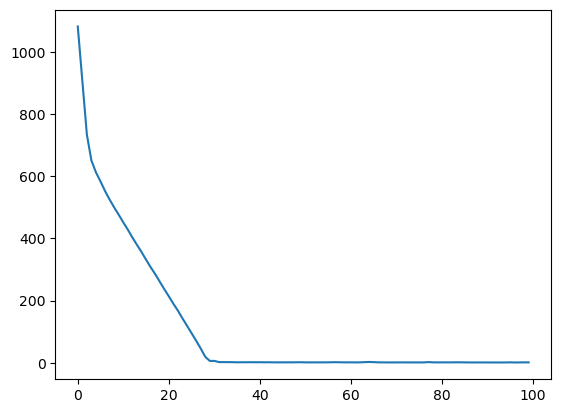

In [34]:
sns.lineplot(x=history.epoch, y=history.history['loss'])

## The Training Curve

Looking at the training curve we have just made.
1. How does the training progress?
* Does the training loss increase or decrease?
* Does it change fast or slowly?
* Is the graph look very jittery?
2. Do you think the resulting trained network will work well on the test set?

## 7.Perform a prediction / classification

In [36]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [40]:
prediction = pd.DataFrame(y_pred, columns=target.columns)

In [41]:
prediction

,Adelie,Chinstrap,Gentoo
0,0.739799,6.149969e-08,2.602014e-01
1,0.998998,1.479510e-04,8.542098e-04
2,0.984610,8.483374e-07,1.538936e-02
3,0.627527,1.311892e-04,3.723422e-01
4,0.998987,1.007846e-03,5.600310e-06
...,...,...,...
64,0.641758,3.582402e-01,1.496814e-06
65,0.962391,3.748944e-02,1.198023e-04
66,0.946380,5.361970e-02,4.888024e-07
67,0.563495,5.788954e-06,4.364994e-01


In [49]:
predicted_species = prediction.idxmax(axis="columns")

In [50]:
predicted_species

0     Adelie
1     Adelie
2     Adelie
3     Adelie
4     Adelie
       ...  
64    Adelie
65    Adelie
66    Adelie
67    Adelie
68    Gentoo
Length: 69, dtype: object

## 8. Measuring performance

In [42]:
from sklearn.metrics import confusion_matrix

In [45]:
y_test

,Adelie,Chinstrap,Gentoo
45,1,0,0
71,1,0,0
103,1,0,0
328,0,0,1
209,0,1,0
...,...,...,...
112,1,0,0
118,1,0,0
170,0,1,0
322,0,0,1


In [46]:
true_species = y_test.idxmax(axis="columns")

In [52]:
matrix = confusion_matrix(true_species, predicted_species)


In [60]:
colnames = y_test.columns.values
confusion_df = pd.DataFrame(matrix, index=colnames, columns=colnames)
confusion_df.index.name="True label"
confusion_df.columns.name = "Predicted label"

In [61]:
confusion_df

Predicted label,Adelie,Chinstrap,Gentoo
True label,,,
Adelie,29,1,0
Chinstrap,14,0,0
Gentoo,8,0,17


<Axes: xlabel='Predicted label', ylabel='True label'>

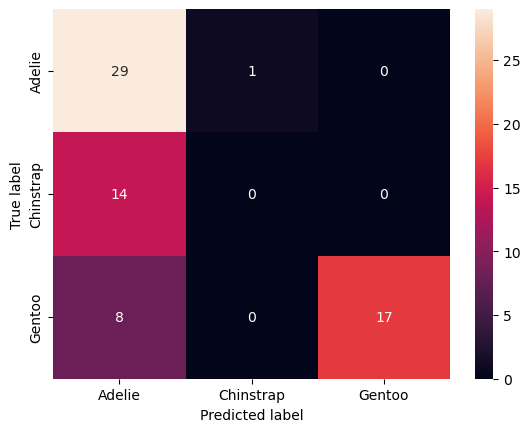

In [62]:
sns.heatmap(confusion_df, annot=True)

## Confusion Matrix

Measure the performance of the neural network you trained and
visualize a confusion matrix.

- Did the neural network perform well on the test set?
- Did you expect this from the training loss you saw?
- What could we do to improve the performance?



## 9. Tune hyperparameters

## 10. Share model

In [64]:
model.save("my_first_model")

INFO:tensorflow:Assets written to: my_first_model/assets


INFO:tensorflow:Assets written to: my_first_model/assets


In [65]:
pretrained_model = keras.models.load_model("my_first_model")

In [67]:
y_pretrained_pred = pretrained_model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [68]:
pretrained_prediction = pd.DataFrame(y_pretrained_pred, columns=target.columns.values)

In [69]:
pretrained_prediction

,Adelie,Chinstrap,Gentoo
0,0.739799,6.149969e-08,2.602014e-01
1,0.998998,1.479510e-04,8.542098e-04
2,0.984610,8.483374e-07,1.538936e-02
3,0.627527,1.311892e-04,3.723422e-01
4,0.998987,1.007846e-03,5.600310e-06
...,...,...,...
64,0.641758,3.582402e-01,1.496814e-06
65,0.962391,3.748944e-02,1.198023e-04
66,0.946380,5.361970e-02,4.888024e-07
67,0.563495,5.788954e-06,4.364994e-01


In [70]:
pretrained_predicted_species = pretrained_prediction.idxmax(axis="columns")

In [71]:
pretrained_predicted_species

0     Adelie
1     Adelie
2     Adelie
3     Adelie
4     Adelie
       ...  
64    Adelie
65    Adelie
66    Adelie
67    Adelie
68    Gentoo
Length: 69, dtype: object